## Backpropagation
- Backpropagation addresses the problem of how to make a multilayer neural network $\textit{learn}$.
- Backpropagation is an extension of updating weights with gradient descent.
- It uses the chain rule to find the error with the respect to the weights connecting the input layer to the hidden layer

### Concepts
1. Ouput layer error $\large \delta_{k}^{0}$
2. Then the error attributed to the hidden unit $j$ is the output error scaled by the weights between the output and hidden layers and the gradient of the hidden layer:
$$\large
\delta_{j}^{h} = \sum W_{jk} \delta_{k}^{0} f'(h_{j})
$$
3. Then the gradient descent step is the same as before, just with the new errors:
$$\large
\Delta w_{ij} = \eta \delta_{j}^{h} x_{i}
$$
where $w_{ij}$ are the weights between the input and hidden layer and $x_{i}$ are input unit values
4. The weight steps are equal to the learn rate times the output error of the layer times the values of the inputs to that layer
$$\large
\Delta w_{pq} = \eta \delta_{output} V_{input}
$$

The output error, $\delta_{output}$, by propagating the errors backwards from higher layers. Input values, $V_{input} are the inputs to the layer, e.g. the hidden layer activations to the ouput unit

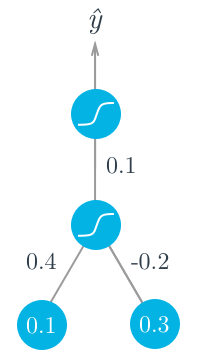

In [4]:
from IPython.display import Image
Path = "/home/isaac/UdacityDL/00_Prep/"
Image(filename=Path + "backprop-network.png", width=150, height=150)

### Working through an example

Assume we're trying to fit some binary data and the target is y = 1. Start with the forward pass.
1. First calculate the input to the hidden unit:
$$\large
h = \sum_{i}w_{i}x_{i} = 0.1 \times 0.4 + 0.3 \times (-0.2) = -0.02
$$
2. Output of the hiddent unit
$$
f(h) = sigmoid(-0.02) = \frac{1}{1 + e^{-1 \times -0.02}} = 0.495
$$
3. Input to the output activation
$$
\alpha = 0.1 \times f(h) = 0.1 \times 0.495 = 0.0495
$$
4. $\textbf{Output of the Network}$
$$
\hat y = sigmoid(\alpha) = \frac{1}{1 + e^{-0.0495}} = 0.51237
$$
5. Calculate the error of the Network
$$
\begin{align}
\delta^{0} & = (y - \hat y)f'(\alpha) \\
& = (y - \hat y)f(\alpha) (1-f(\alpha))) \\ 
& = (y - \hat  y)\hat y(1-\hat y) \\
& = (1 - 0.51237) \times 0.51237 \times (1-0.51237) \\
& = 0.12183
\end{align}
$$
6. Calculate the error of the hidden network
$$
\begin{align}
\delta_{j}^{h} &= W\delta^{0}f'(h) \\ 
&= 0.1 \times 0.12183 \times 0.495 \times (1-0.495) \\
&= 0.0030439
\end{align}
$$
7. Calculate the gradient descent steps: The hidden to output gradient weight step
$$
\Delta W = \eta \delta^{0} f(h) = 0.5 \times 0.12183 \times 0.495 = 0.030153
$$
8. For the input to hidden weights $w_{i}$, it's the learning rate times the hidden unit error, times the input values
$$
\Delta w_{i} = \eta \delta_{j}^{h} x_{i} = 0.5 \times 0.0030439 \times [0.1 \hspace{4mm} 0.3] = [1.5220e-04 \hspace{4mm} 4.5658e-04]
$$

## Implementation

In [9]:
import numpy as np

In [10]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [41]:
x = np.array([0.5, 0.1, -0.2])
target = 0.6
learnrate = 0.5

weights_input_hidden = np.array([[0.5, -0.6],
                                 [0.1, -0.2],
                                 [0.1, 0.7]])

weights_hidden_output = np.array([0.1, -0.3])
## Forward pass
hidden_layer_input = np.dot(x, weights_input_hidden)
hidden_layer_output = sigmoid(hidden_layer_input)

output_layer_in = np.dot(hidden_layer_output, weights_hidden_output)
output = sigmoid(output_layer_in)

## Backwards pass
## TODO: Calculate error
error = target - output

# TODO: Calculate error gradient for output layer
del_err_output = error * output * (1 - output)

# TODO: Calculate error gradient for hidden layer
del_err_hidden = del_err_output * weights_hidden_output * hidden_layer_output * (1-hidden_layer_output) 
    
# TODO: Calculate change in weights for hidden layer to output layer
delta_w_h_o = learnrate * del_err_output * hidden_layer_output

# TODO: Calculate change in weights for input layer to hidden layer
delta_w_i_o = learnrate * del_err_hidden * x[:, None]

print('Change in weights for hidden layer to output layer:')
print(delta_w_h_o)
print('Change in weights for input layer to hidden layer:')
print(delta_w_i_o)

Change in weights for hidden layer to output layer:
[ 0.00804047  0.00555918]
Change in weights for input layer to hidden layer:
[[  1.77005547e-04  -5.11178506e-04]
 [  3.54011093e-05  -1.02235701e-04]
 [ -7.08022187e-05   2.04471402e-04]]


In [1]:
import numpy as np


def sigmoid(x):
    """
    Calculate sigmoid
    """
    return 1 / (1 + np.exp(-x))


x = np.array([0.5, 0.1, -0.2])
target = 0.6
learnrate = 0.5

weights_input_hidden = np.array([[0.5, -0.6],
                                 [0.1, -0.2],
                                 [0.1, 0.7]])

weights_hidden_output = np.array([0.1, -0.3])

## Forward pass
hidden_layer_input = np.dot(x, weights_input_hidden)
hidden_layer_output = sigmoid(hidden_layer_input)

output_layer_in = np.dot(hidden_layer_output, weights_hidden_output)
output = sigmoid(output_layer_in)

## Backwards pass
## TODO: Calculate error
error = target - output

# TODO: Calculate error gradient for output layer
del_err_output = error * sigmoid(output_layer_in) * (1 - sigmoid(output_layer_in))

# TODO: Calculate error gradient for hidden layer

del_err_hidden = np.dot(del_err_output, weights_hidden_output) * \
                 hidden_layer_output * (1 - hidden_layer_output)

# TODO: Calculate change in weights for hidden layer to output layer
delta_w_h_o = learnrate * del_err_output * hidden_layer_output

# TODO: Calculate change in weights for input layer to hidden layer
delta_w_i_o = learnrate * del_err_hidden * x[:, None]

print('Change in weights for hidden layer to output layer:')
print(delta_w_h_o)
print('Change in weights for input layer to hidden layer:')
print(delta_w_i_o)

Change in weights for hidden layer to output layer:
[ 0.00804047  0.00555918]
Change in weights for input layer to hidden layer:
[[  1.77005547e-04  -5.11178506e-04]
 [  3.54011093e-05  -1.02235701e-04]
 [ -7.08022187e-05   2.04471402e-04]]
